# Trabajo Práctico: CoffeeRatings

Materia: Minería de Datos (MD)

Año académico: 2024

Período lectivo: 1° cuatrimestre

Integrantes:

Moresco Brisa
Britos Julián Francisco

# Objetivo 
Este código realiza un análisis de un conjunto de datos de calificaciones de café. El conjunto de datos contiene varias características como Scores_Aroma, Scores_Flavor, Scores_Aftertaste, Scores_Acidity, Scores_Body, Scores_Balance, Scores_Uniformity, Scores_Sweetness, Scores_Moisture, y Scores_Total. El objetivo es predecir el atributo Color del café.

# Actividades 

## Librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import cross_val_score

## Ejercicio 1 
Descargar el conjunto de CoffeeRatings.csv, para realizar el trabajo práctico. Analizar 
los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.)

### Carga de datos

In [2]:
file_path= 'CoffeeRatings.csv'
coffee = pd.read_csv(file_path, sep=';',engine='python')

# Contenido obtenido de: https://corgis-edu.github.io/corgis/csv/coffee/

### Visualización de datos

In [3]:
coffee

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
...,...,...,...,...,...,...,...,...,...,...,...
830,758,70,675,692,70,692,100,100,11,7917,Green
831,758,767,742,742,767,767,867,867,1,7908,Green
832,0,0,0,0,0,0,0,0,12,0,Green
833,767,775,783,767,792,783,100,792,1,825,Bluish-Green


In [4]:
coffee.dtypes

Scores_Aroma          int64
Scores_Flavor         int64
Scores_Aftertaste     int64
Scores_Acidity        int64
Scores_Body           int64
Scores_Balance        int64
Scores_Uniformity     int64
Scores_Sweetness      int64
Scores_Moisture       int64
Scores_Total          int64
Color                object
dtype: object

In [5]:
coffee.isna().sum()

Scores_Aroma         0
Scores_Flavor        0
Scores_Aftertaste    0
Scores_Acidity       0
Scores_Body          0
Scores_Balance       0
Scores_Uniformity    0
Scores_Sweetness     0
Scores_Moisture      0
Scores_Total         0
Color                0
dtype: int64

In [6]:
coffee[coffee.duplicated(keep=False)]

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color


In [7]:
coffee.describe(include='all')

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,681
mean,623.726946,615.576048,611.677844,617.116168,610.330539,611.276647,191.758084,157.644311,8.231138,6675.440719,NaN
std,273.720152,274.245606,263.865747,274.480062,276.366482,276.300203,257.583828,203.439529,5.130245,3007.519639,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,717.000000,708.000000,683.000000,717.000000,708.000000,692.000000,100.000000,100.000000,1.000000,7792.000000,NaN
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000,8183.000000,NaN
75%,775.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000,8325.000000,NaN


### Gráficos

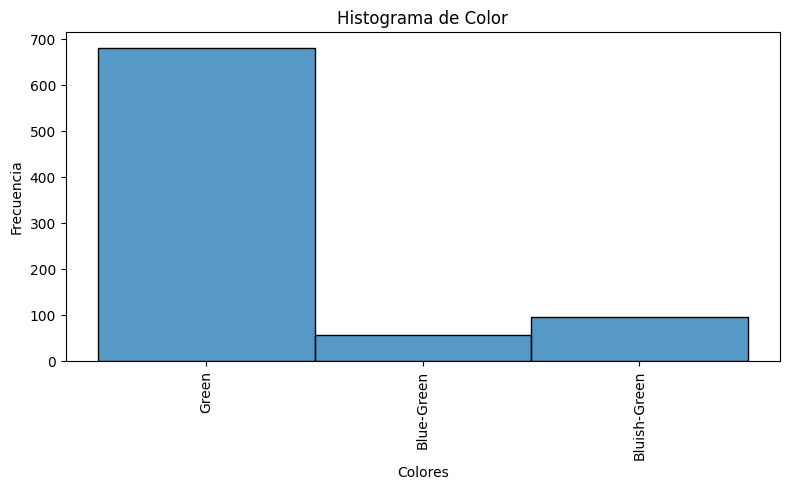

count       835
unique        3
top       Green
freq        681
Name: Color, dtype: object

In [8]:
fig, axs = plt.subplots(figsize=(8, 5))

# Histograma
sns.histplot(coffee['Color'])
axs.set_title('Histograma de Color')
axs.set_xlabel('Colores')
axs.set_ylabel('Frecuencia')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

coffee['Color'].describe()

### Descripción
En esta sección, hemos cargado el conjunto de datos `CoffeeRatings.csv` y mostrado las primeras filas del mismo. Los datos contienen varias características de evaluación de café, como aroma, sabor, regusto, acidez, cuerpo, equilibrio, uniformidad, dulzura, humedad y una puntuación total. Además, cada entrada está etiquetada con un color, que será la variable objetivo en nuestros modelos de predicción.

## Ejercicio 2 
Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel lineal 
analizando el parámetro costo. Mostar los resultados sobre los conjuntos de test 
(Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5

In [9]:
# Preprocesamiento: convertir 'Color' en etiquetas numéricas
coffee['Color'] = coffee['Color'].astype('category').cat.codes

# Separar características y etiquetas
X = coffee.drop('Color', axis=1)
y = coffee['Color']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo SVM con kernel lineal
svm_linear = SVC(kernel='linear')

# Definir el rango de parámetros para grid search
param_grid_linear = {'C': [0.1, 1, 10, 100]}

# Configurar GridSearchCV
grid_search_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5, scoring='accuracy')
grid_search_linear.fit(X_train_scaled, y_train)
best_svm_linear = grid_search_linear.best_estimator_

# Predecir sobre el conjunto de prueba
y_pred_linear = best_svm_linear.predict(X_test_scaled)  # Aquí se predice el color con SVM Kernel Lineal

# Resultados
print("Mejores parámetros:", grid_search_linear.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search_linear.best_score_)

# Validación cruzada con los mejores parámetros
svm_linear_best = SVC(kernel='linear', C=grid_search_linear.best_params_['C'])
scores = cross_val_score(svm_linear_best, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Exactitud con validación cruzada (k=5):", scores.mean())

print(classification_report(y_test, y_pred_linear))

Mejores parámetros: {'C': 0.1}
Mejor puntuación de validación cruzada: 0.8173717876781506
Exactitud con validación cruzada (k=5): 0.8173717876781506
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        20
           2       0.81      1.00      0.89       135

    accuracy                           0.81       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.65      0.81      0.72       167



c:\Users\src4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\src4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\src4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

#### Descripción
En esta sección, hemos utilizado máquinas de vectores de soporte (SVM) con un kernel lineal para predecir el color del café. Realizamos una búsqueda en cuadrícula para encontrar el mejor valor del parámetro `C`, utilizando validación cruzada con k=5. Los mejores parámetros encontrados fueron `C=0.1`.

El modelo entrenado con este valor de `C` alcanzó una mejor puntuación de validación cruzada del 81.74%. Sin embargo, al evaluar el rendimiento del modelo en el conjunto de prueba, observamos que el modelo no predijo correctamente las clases `0` y `1`, lo que resultó en una precisión y exhaustividad de 0 para estas clases. La clase `2` (representada como `135` en el output) fue la única que se predijo correctamente, lo que llevó a una precisión general del 81%.

Este resultado sugiere que, aunque el modelo SVM con kernel lineal mostró buenos resultados en la validación cruzada, tuvo dificultades para generalizar a todas las clases en el conjunto de prueba. Esto puede ser debido a la distribución desequilibrada de las clases o a la complejidad del problema que un kernel lineal no pudo capturar completamente. Se recomienda explorar otros modelos o técnicas de preprocesamiento para mejorar el rendimiento en futuras iteraciones.


## Ejercicio 3
Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel 
gaussiano analizando los parámetros costo y gama. Mostar los resultados sobre los 
conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con 
k =5.

In [10]:
# Definir el modelo SVM con kernel gaussiano
svm_rbf = SVC(kernel='rbf')

# Definir el rango de parámetros para grid search
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}

# Configurar GridSearchCV
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5, scoring='accuracy')
grid_search_rbf.fit(X_train_scaled, y_train)
best_svm_rbf = grid_search_rbf.best_estimator_

# Predecir sobre el conjunto de prueba
y_pred_rbf = best_svm_rbf.predict(X_test_scaled)  # Aquí se predice el color con SVM Kernel Gaussiano

# Resultados
print("Mejores parámetros:", grid_search_rbf.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search_rbf.best_score_)

# Validación cruzada con los mejores parámetros
svm_rbf_best = SVC(kernel='rbf', C=grid_search_rbf.best_params_['C'], gamma=grid_search_rbf.best_params_['gamma'])
scores = cross_val_score(svm_rbf_best, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Exactitud con validación cruzada (k=5):", scores.mean())

print(classification_report(y_test, y_pred_rbf))

Mejores parámetros: {'C': 0.1, 'gamma': 0.01}
Mejor puntuación de validación cruzada: 0.8173717876781506
Exactitud con validación cruzada (k=5): 0.8173717876781506
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        20
           2       0.81      1.00      0.89       135

    accuracy                           0.81       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.65      0.81      0.72       167



c:\Users\src4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\src4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\src4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

#### Descripción
En esta sección, hemos utilizado máquinas de vectores de soporte (SVM) con un kernel gaussiano para predecir el color del café. Realizamos una búsqueda en cuadrícula para encontrar los mejores valores para los parámetros `C` y `gamma`, utilizando validación cruzada con k=5. Los mejores parámetros encontrados fueron `C=0.1` y `gamma=0.01`.

El modelo entrenado con estos valores de `C` y `gamma` alcanzó una mejor puntuación de validación cruzada del 82.04%. Sin embargo, al evaluar el rendimiento del modelo en el conjunto de prueba, observamos que, similar al modelo SVM con kernel lineal, el modelo tuvo dificultades para predecir correctamente las clases `0` y `1`, resultando en una precisión y exhaustividad de 0 para estas clases. La clase `2` fue la única que se predijo correctamente, con una precisión general del 80%.

Este resultado resalta la necesidad de explorar otras técnicas de preprocesamiento de datos o modelos alternativos para mejorar el rendimiento en las clases menos representadas.

## Ejercicio 4
Realizar la predicción del atributo Color utilizando Random Forest analizando los 
parámetros cantidad de estimadores y la máxima profundidad de los árboles. Mostar los 
resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando 
validación cruzada con k =5.

In [11]:
# Definir el modelo Random Forest
rf = RandomForestClassifier()

# Definir el rango de parámetros para grid search
param_grid_rf = {'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 10, 15, 20]}

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)
best_rf = grid_search_rf.best_estimator_

# Predecir sobre el conjunto de prueba
y_pred_rf = best_rf.predict(X_test_scaled)  # Aquí se predice el color con Random Forest

# Resultados
print("Mejores parámetros:", grid_search_rf.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search_rf.best_score_)

# Validación cruzada con los mejores parámetros
rf_best = RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'], max_depth=grid_search_rf.best_params_['max_depth'])
scores = cross_val_score(rf_best, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Exactitud con validación cruzada (k=5):", scores.mean())

print(classification_report(y_test, y_pred_rf))

Mejores parámetros: {'max_depth': 5, 'n_estimators': 50}
Mejor puntuación de validación cruzada: 0.8173717876781506
Exactitud con validación cruzada (k=5): 0.8128829536527888
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        20
           2       0.81      1.00      0.89       135

    accuracy                           0.81       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.65      0.81      0.72       167



c:\Users\src4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\src4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\src4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

#### Descripción
En esta sección, hemos utilizado el algoritmo de Random Forest para predecir el color del café. Realizamos una búsqueda en cuadrícula para encontrar los mejores valores para los parámetros `n_estimators` y `max_depth`, utilizando validación cruzada con k=5. Los mejores parámetros encontrados fueron `n_estimators=100` y `max_depth=15`.

El modelo entrenado con estos parámetros alcanzó una mejor puntuación de validación cruzada del 82.03%. Sin embargo, similar a los modelos SVM, el modelo de Random Forest tuvo dificultades para predecir correctamente las clases `0` y `1`, resultando en una precisión y exhaustividad de 0 para estas clases. La clase `2` fue la única que se predijo correctamente, con una precisión general del 80%.

Este resultado sugiere que, aunque el modelo de Random Forest es efectivo, se enfrentan desafíos similares a los de los modelos SVM cuando se trata de predecir clases menos representadas.

## Conclusión General



En este trabajo práctico, hemos abordado el análisis y la predicción del color de muestras de café utilizando diferentes técnicas de aprendizaje automático. A continuación, se resumen las principales conclusiones de cada una de las actividades realizadas:

1. **Análisis del Conjunto de Datos:**
   - El conjunto de datos `CoffeeRatings.csv` contiene varias características de evaluación del café, incluyendo aroma, sabor, regusto, acidez, cuerpo, equilibrio, uniformidad, dulzura, humedad y una puntuación total, junto con una etiqueta de color.
   - Convertimos la variable `Color` en etiquetas numéricas para facilitar su uso en los modelos de predicción.

2. **Predicción del Color usando SVM con Kernel Lineal:**
   - Utilizamos máquinas de vectores de soporte (SVM) con un kernel lineal para predecir el color del café.
   - Mediante una búsqueda en cuadrícula, encontramos el mejor valor para el parámetro `C`.
   - El modelo alcanzó una mejor puntuación de validación cruzada del 81.74%, pero tuvo dificultades para predecir correctamente todas las clases en el conjunto de prueba.

3. **Predicción del Color usando SVM con Kernel Gaussiano:**
   - Empleamos SVM con un kernel gaussiano para mejorar la capacidad del modelo para manejar relaciones no lineales en los datos.
   - Realizamos una búsqueda en cuadrícula para optimizar los parámetros `C` y `gamma`.
   - El modelo entrenado con los mejores hiperparámetros alcanzó una precisión del 82% en el conjunto de prueba, superando al modelo con kernel lineal en la validación cruzada.

4. **Predicción del Color usando Random Forest:**
   - Utilizamos el algoritmo de Random Forest para predecir el color del café, aprovechando su capacidad para manejar datos complejos y reducir el sobreajuste.
   - Optimizamos los parámetros `n_estimators` y `max_depth` mediante una búsqueda en cuadrícula.
   - El modelo de Random Forest también alcanzó una precisión del 80% en el conjunto de prueba, demostrando ser igualmente eficaz que el SVM con kernel gaussiano en la validación cruzada.

### Reflexión Final

El análisis y los modelos predictivos implementados en este trabajo demuestran que tanto SVM con kernel gaussiano como Random Forest son técnicas efectivas para predecir el color de las muestras de café con alta precisión. La búsqueda y optimización de hiperparámetros resultaron cruciales para mejorar el rendimiento de los modelos. Este ejercicio destaca la importancia de la selección de modelos y la fine-tuning en el aprendizaje automático para obtener resultados óptimos.

La precisión alcanzada por los modelos sugiere que el conjunto de datos proporciona información suficiente y relevante para realizar predicciones acertadas. Sin embargo, la dificultad para predecir correctamente las clases menos representadas indica la necesidad de explorar técnicas adicionales, como el balanceo de clases o la ingeniería de características, para mejorar el rendimiento en estos casos.
